Catatan: Buku ini diambil dari notebook Kaggle [Visualisasi Data COVID-19 Indonesia](https://www.kaggle.com/tarumainfo/visualisasi-data-covid-19-indonesia). Yang membedakan adalah dataset yang digunakan. 

-----

Pada buku ini, hanya fokus dalam memvisualisasikan data jumlah kasus konfirmasi dan/atau jumlah spesimen COVID-19 di Indonesia. 

## Kode

Pengembangan kode untuk visualisasi disimpan didalam modul **inkovis**. Modul inkovis tersedia di [github.com/taruma/inkovis](https://github.com/taruma/inkovis). Untuk melihat kodenya bisa juga dilihat pada output file dari buku ini. 

## Dataset

Dataset menggunakan data `data_infeksi_covid19_indonesia` yang tersedia di `dataset/` [github.com/taruma/inkovis](https://github.com/taruma/inkovis). Informasi mengenai dataset bisa dibaca di halaman [README](https://github.com/taruma/inkovis/blob/master/README.md). Visualisasi pada buku ini menggunakan periode **31 hari terakhir**. 

## Objektif

Berikut objektif yang ingin dicapai dalam visualisasi:

- Menyampaikan informasi jumlah kasus konfirmasi dan/atau jumlah spesimen dalam satu grafik.
- Menampilkan perkembangan pada kasus konfirmasi dan/atau jumlah spesimen dalam satu grafik.
- Menyertakan informasi angka untuk memudahkan pembacaan data tiap harinya.
- Dapat melakukan pada periode tertentu dan dalam _step_ hari tertentu.

-----

# INISIASI BUKU

In [1]:
IS_LOCAL = True

In [2]:
# PEMASANGAN MODUL INKOVIS
if IS_LOCAL:
    pass
else:
    !wget -O inkovis.py "https://github.com/taruma/inkovis/raw/master/notebook/inkovis.py" -q
    !wget -O so.py "https://github.com/taruma/inkovis/raw/master/notebook/so.py" -q

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import inkovis

-----

# DATASET

In [4]:
ALAMAT_DATASET = 'https://github.com/taruma/inkovis/raw/master/dataset/data_infeksi_covid19_indonesia.csv'
dataset_inkovis = pd.read_csv(ALAMAT_DATASET, index_col=0, parse_dates=True, header=0)
dataset_inkovis.tail()

,jumlah_periksa,konfirmasi,sembuh,meninggal,negatif,proses_periksa,kasus_perawatan,catatan
tanggal,,,,,,,,
2020-03-28,6266,1155,59,102,5111,0,0,NaN
2020-03-29,6534,1285,64,114,5249,0,0,NaN
2020-03-30,6663,1414,75,122,5249,0,0,NaN
2020-03-31,6777,1528,81,136,5249,0,0,NaN
2020-04-01,7193,1677,103,157,5516,0,0,NaN


-----

# VISUALISASI

Pada proses visualisasi akan digunakan jenis _stacked bar_. Alasan penggunaan _stacked bar_ dikarenakan:

- Kolom `jumlah_periksa` merupakan penjumlahan dari `konfirmasi`, `negatif`, dan `proses_periksa`. Diasumsikan bahwa `proses_periksa` merupakan bagian dari `jumlah_periksa` karena alasan penggunaan "spesimen yang telah diterima" pada infografis situs KEMKES meski hasilnya belum diketahui positif/negatif COVID-19. 
- Kolom `konfirmasi` merupakan penjumlahan dari `sembuh`, `meninggal`, `dirawat`. Kolom `dirawat` dihitung menggunakan formula `konfirmasi-(sembuh+meninggal)`. Kolom `dirawat` sebenarnya telah disediakan pada dataset kaggle di kolom `isolated`, akan tetapi karena saat pengembangan modul inkovis data tersebut tidak tersedia, digunakan formula tersebut.
- Penggunaan _stacked bar_ bisa melihat proporsi data. Pada `jumlah periksa`, dapat melihat proporsi antara hasil yang `konfirmasi` dan `negatif`. Sedangkan pada `konfirmasi` bisa melihat proporsi antara `sembuh`, `meninggal`, dan `dirawat`. 

Saya membagi visualisasi menjadi dua bagian yaitu visualisasi akumulasi/total dan visualisasi perubahan/perkembangan. Visualisasi akumulasi/total lebih fokus menampilkan data yang telah terakumulasi setiap harinya, sedangkan visualisasi perubahan/perkembangan lebih fokus menampilkan perubahan data dari hari ke hari. 


In [5]:
# PENGATURAN PARAMS VISUALISASI
FIG_SIZE = (20, 8)
FIG_SIZE_GROUP = (20, 12)

# PARAM FUNGSI
DATASET = dataset_inkovis[-31:]
MASK = None
DAYS = 1

## VISUALISASI AKUMULASI/TOTAL

Catatan pada visualisasi akumulasi/total:

- Setiap grafik harus mampu menampilkan nilai/angka untuk memudahkan saat membaca grafik. Contoh: angka `konfirmasi` tersedia pada grafik. 
- Angka masing-masing kategori harus dapat ditampilkan. Contoh: Pada kasus konfirmasi, setiap bar harus mampu menampilkan angka proporsi datanya (`dirawat`, `sembuh`, dan `meninggal`).
- Pada kasus konfirmasi dan jumlah spesimen, dapat ditampilkan perubahan/perkembangan data yang ditampilkan juga dalam bentuk _stacked bar_.
- Pada kasus konfirmasi dan jumlah spesimen, angka perubahan/perkembangan dengan masing-masing kategori harus dapat ditampilkan.
- Urutan _legend_ harus mengikuti _stacked bar_ agar memudahkan memahami grafik.

### KASUS KONFIRMASI 


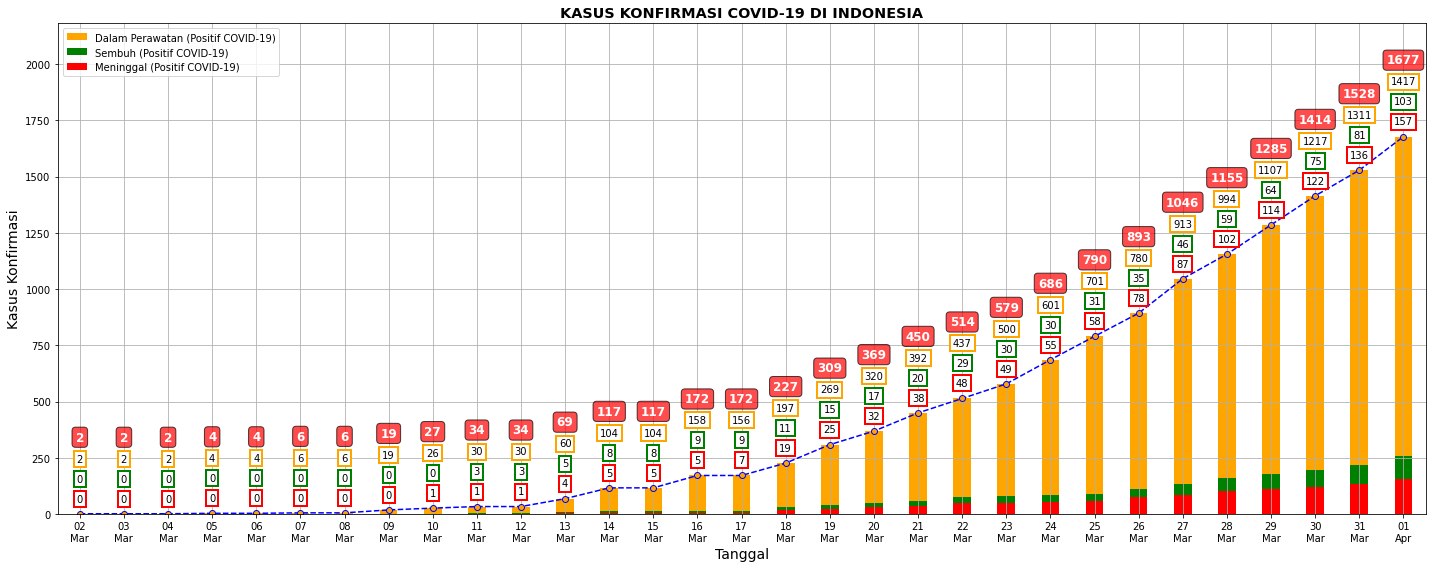

In [6]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

inkovis.plot_confirmed_case(
    dataset=DATASET, ax=ax, mask=MASK, days=DAYS,
    show_diff_numbers=False, show_hist=True,
    show_diff_bar=False,
    show_info=False
)

plt.savefig('KASUS_KONFIRMASI_HARIAN.png', dpi=150)

### JUMLAH SPESIMEN

Pada modul ini istilah "jumlah spesimen" memiliki arti yang sama dengan "jumlah yang diperiksa". Penggunaan kata "spesimen" mengikuti infografis yang tersedia di situs infeksiemerging.kemkes.go.id. 

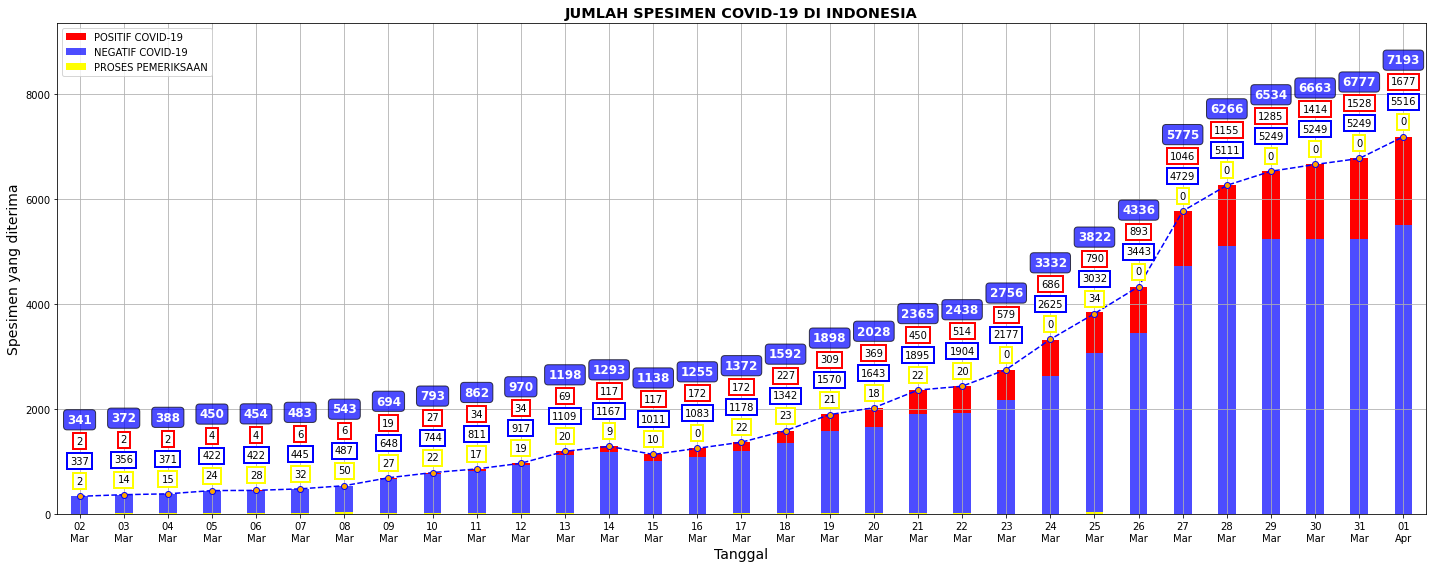

In [7]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

inkovis.plot_testing_case(
    dataset=DATASET, ax=ax, mask=MASK, days=DAYS,
    show_diff_numbers=False, show_hist=True,
    show_diff_bar=False,
    show_info=False)

plt.savefig('JUMLAH_SPESIMEN_HARIAN.png', dpi=150)

## VISUALISASI PERUBAHAN/PERKEMBANGAN

Catatan pada visualisasi perubahan/perkembangan:

- Fokus visualisasi ini adalah perubahan data dari hari ke hari. 
- Urutan _stacked bar_ menyamai dengan visualiasi akumulasi/total untuk konsistensi kecuali pada grafik perkembangan jumlah spesimen.
- Pada kasus konfirmasi, dipisahkan kategori antara `dirawat` dengan `sembuh` dan `meninggal` pada garis horisontal yang memotong sumbu $y$ pada $y=0$. Hal ini juga diterapkan pada jumlah spesimen yang memisahkan antara `negatif` dan `proses_periksa` dengan `positif`. 
- Grafik kartesian dimodifikasi berupa setiap nilai pada dibawah $y=0$ selalu positif. Hal ini dilakukan karena bar yang dibawah sumbu $y=0$ bukan berarti negatif/berkurang akan tetapi menunjukkan jumlah beda dari hari sebelumnya. Modifikasi ini hanya berupa tampilan saja.
- Grafik dapat menampilkan akumulasi/total yang samar sehingga grafik perubahan/perkembangan tidak memerlukan grafik tambahan akumulasi/total.
- Khusus untuk grafik jumlah spesimen, urutan _stacked bar_ diubah yaitu menjadi `negatif`, `proses_periksa`, dan `positif` dengan `positif` dibawah $y=0$. Hal ini dikarenakan proporsi `negatif` akan selalu lebih besar dibandingkan `positif`, maka ruang gambar pada grafik di sisi `negatif` akan lebih besar. Jika sisi `negatif` berada dibawah $y=0$ membuat grafik samar akumulasi tidak jelas jika digambar diatas $y=0$. Oleh karena itu, untuk memudahkan membaca grafik, urutannya diubah. 

### PERKEMBANGAN KASUS KONFIRMASI

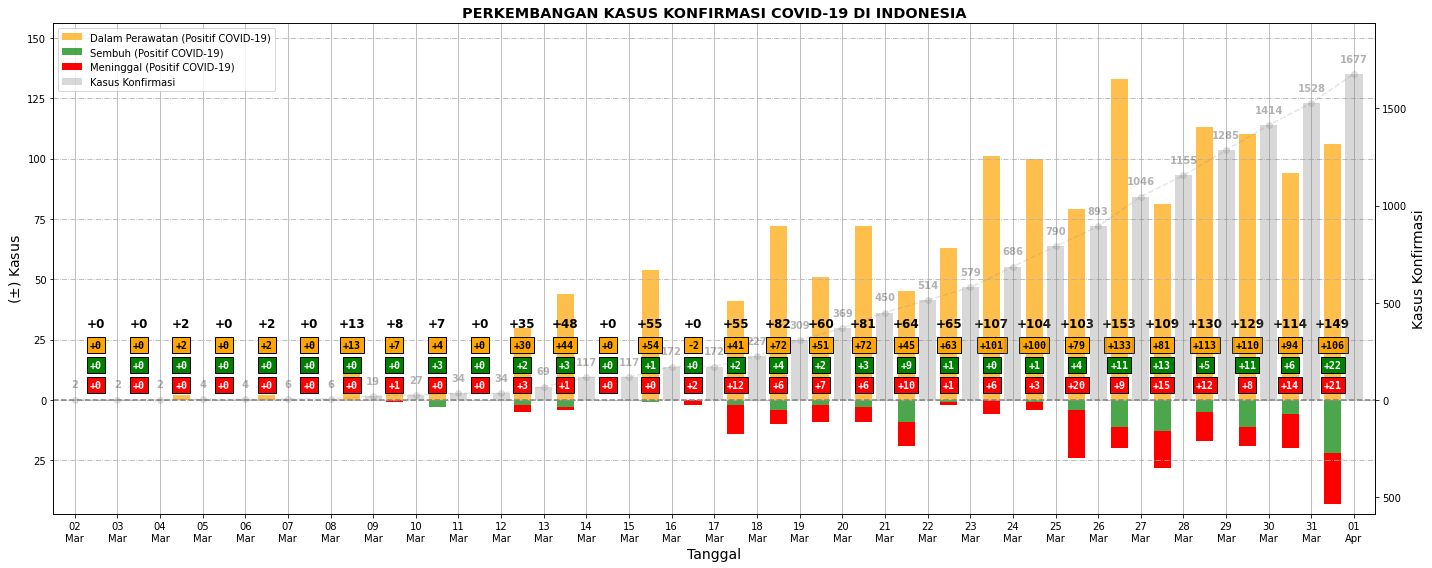

In [8]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_confirmed_growth(
    dataset=DATASET, ax=ax, mask=MASK, days=DAYS,
    show_info=False,
    show_confirmed=True, show_confirmed_numbers=True)

plt.savefig('PERKEMBANGAN_KASUS_KONFIRMASI_HARIAN.png', dpi=150)

### PERKEMBANGAN JUMLAH SPESIMEN

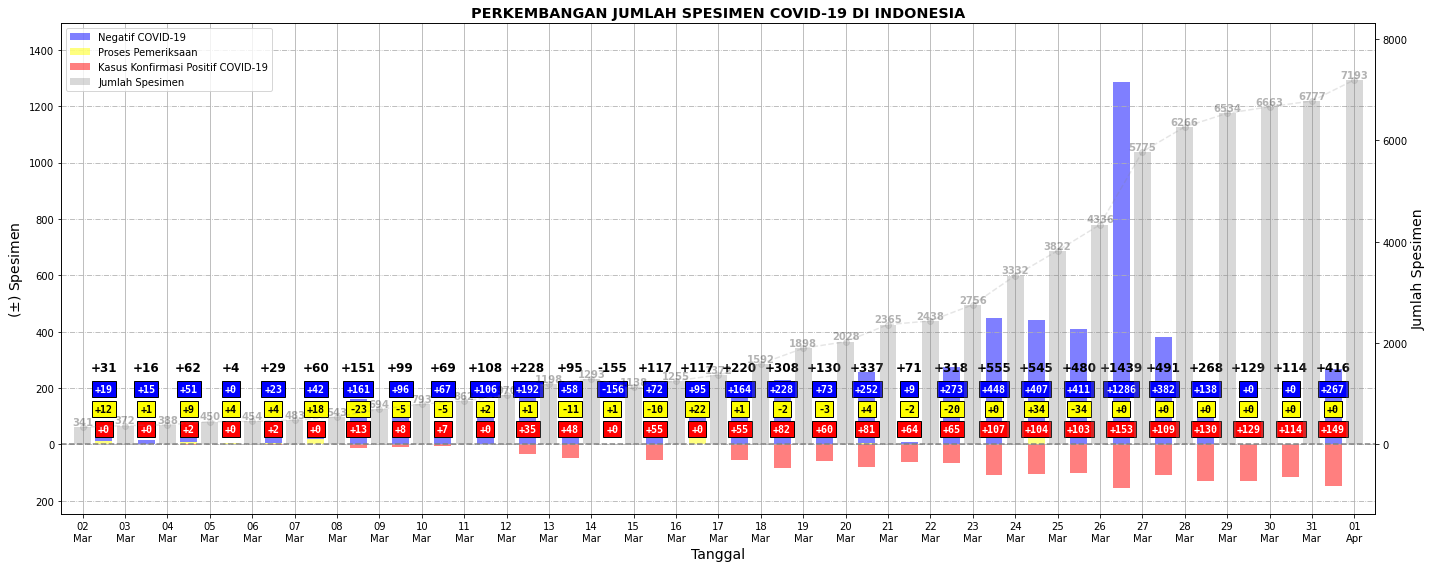

In [9]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
inkovis.plot_testing_growth(
    dataset=DATASET, ax=ax, mask=MASK, days=DAYS,
    show_info=False,
    show_confirmed=True)

plt.savefig('PERKEMBANGAN_JUMLAH_SPESIMEN_HARIAN.png', dpi=150)

-----

# GRAFIK GABUNGAN

Visualisasi akumulasi/total dan perubahan/perkembangan digabungkan dalam satu grafik/figur/gambar.

## AKUMULASI/TOTAL DAN PERUBAHAN/PERKEMBANGAN

### KASUS KONFIRMASI DAN PERKEMBANGANNYA

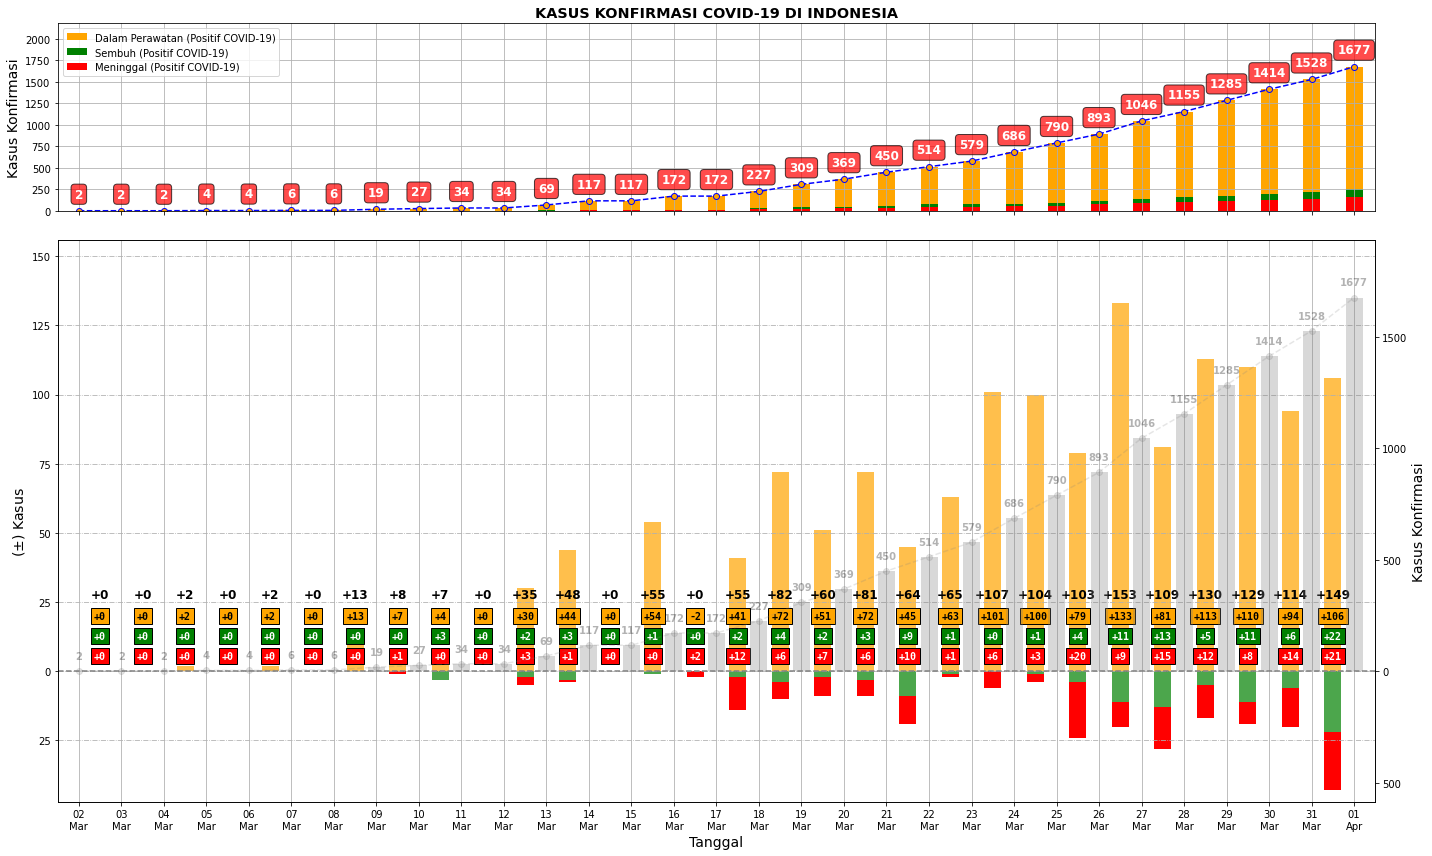

In [10]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=FIG_SIZE_GROUP, sharex=True,
    gridspec_kw={'height_ratios':[1, 3]})

inkovis.plot_confirmed_case(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=False
)

inkovis.plot_confirmed_growth(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_bar=True, show_confirmed=True, 
    show_numbers=True,
    show_total_numbers=True, show_title=False, show_info=False,
    show_legend=False
)
ax[0].set_xlabel('');

plt.savefig('KONFIRMASI_PERKEMBANGAN_HARIAN.png', dpi=150)

### JUMLAH SPESIMEN DAN PERKEMBANGANNYA

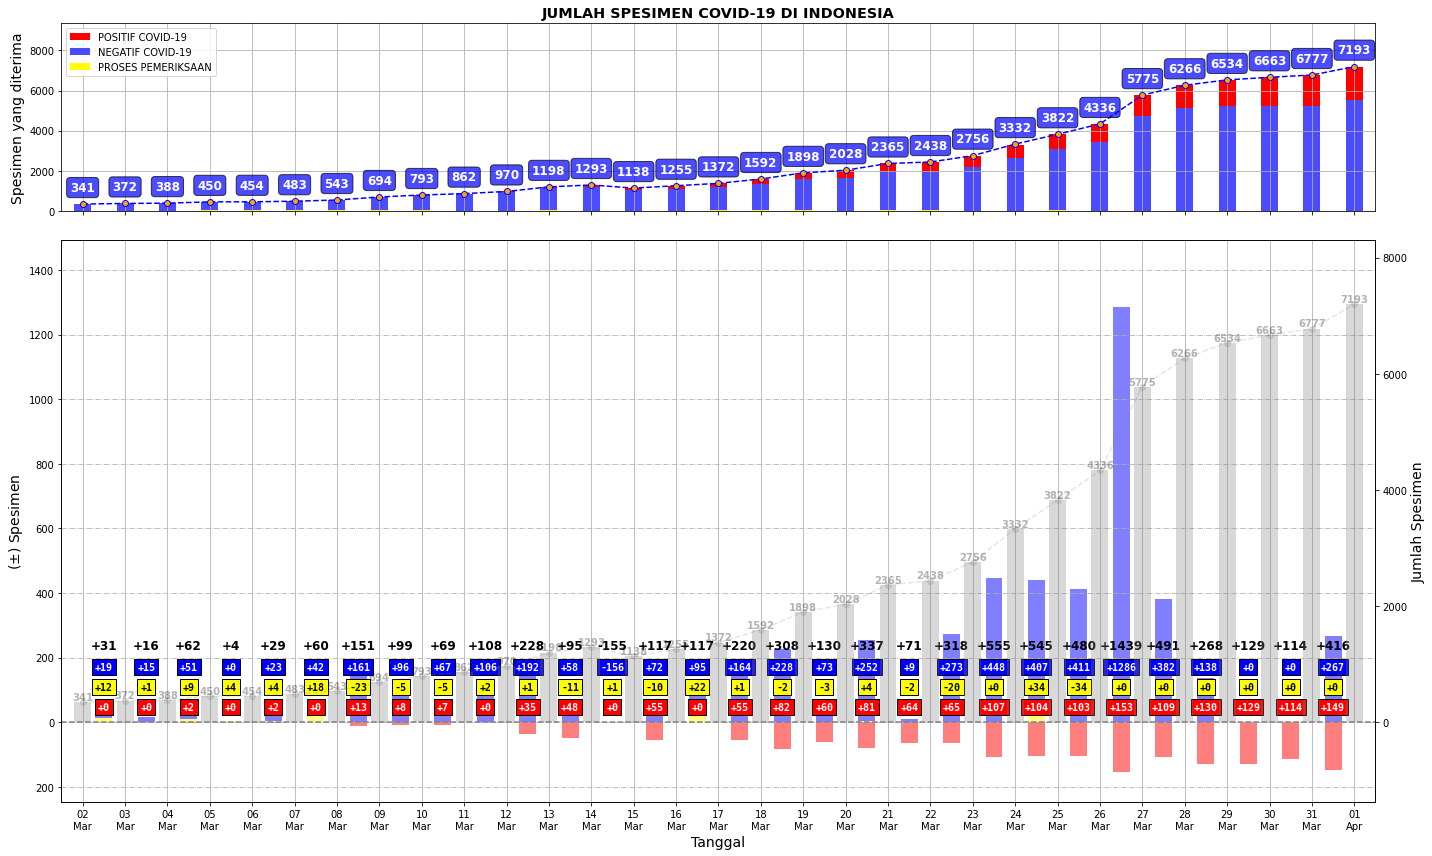

In [11]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=FIG_SIZE_GROUP, sharex=True,
    gridspec_kw={'height_ratios':[1, 3]})

inkovis.plot_testing_case(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=False
)

inkovis.plot_testing_growth(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_bar=True, show_confirmed=True, 
    show_numbers=True,
    show_total_numbers=True, show_title=False, show_info=False,
    show_legend=False
)

ax[0].set_xlabel('');
plt.savefig('SPESIMEN_PERKEMBANGAN_HARIAN.png', dpi=150)

## AKUMULASI/TOTAL

### KASUS KONFIRMASI DAN JUMLAH SPESIMEN

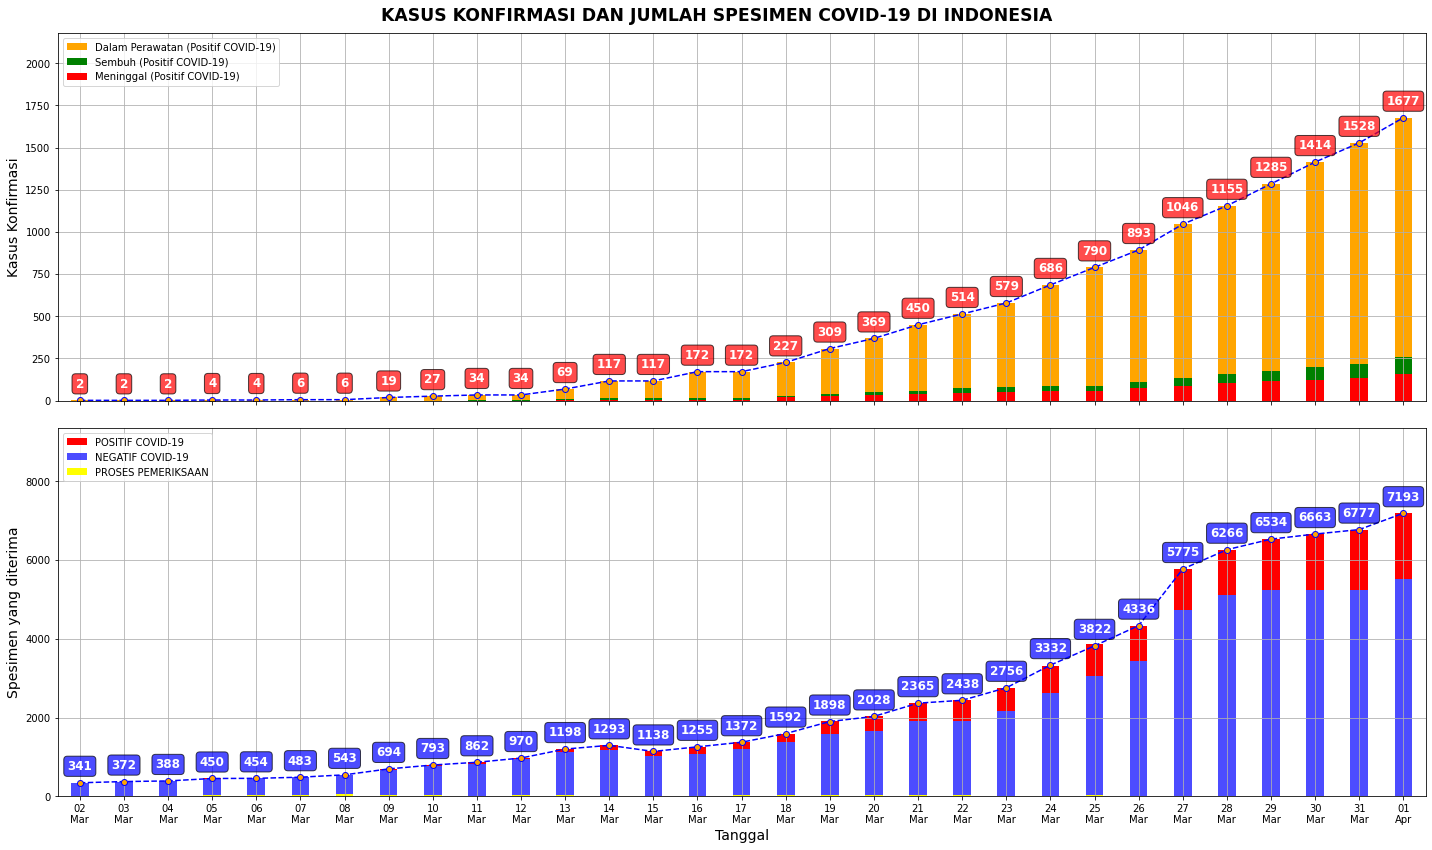

In [12]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=FIG_SIZE_GROUP, sharex=True,
    gridspec_kw={'height_ratios':[1, 1]})

_DATASET = dataset_inkovis

inkovis.plot_confirmed_case(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=False, show_title=False
)

inkovis.plot_testing_case(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_diff_bar=False, show_info=False, show_hist=False, show_title=False
)

fig.suptitle("KASUS KONFIRMASI DAN JUMLAH SPESIMEN COVID-19 DI INDONESIA", fontweight='bold', fontsize='xx-large')
fig.subplots_adjust(top=0.95)

ax[0].set_xlabel('');
plt.savefig('KONFIRMASI_SPESIMEN_HARIAN.png', dpi=150)

## PERUBAHAN/PERKEMBANGAN

### PERKEMBANGAN KASUS KONFIRMASI DAN JUMLAH SPESIMEN

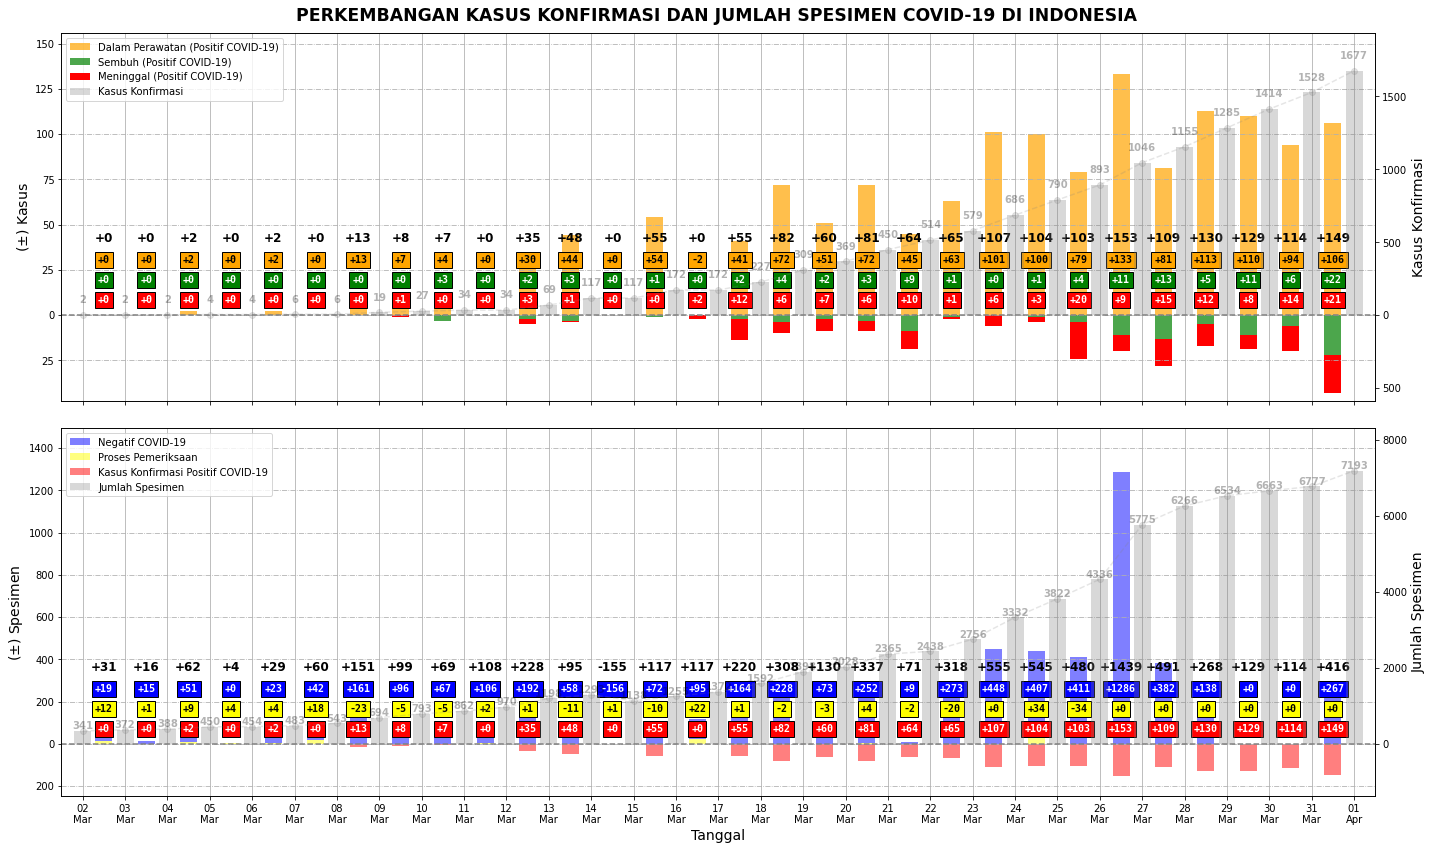

In [13]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=FIG_SIZE_GROUP, sharex=True,
    gridspec_kw={'height_ratios':[1, 1]})

_DATASET = dataset_inkovis

inkovis.plot_confirmed_growth(
    dataset=DATASET, ax=ax[0], mask=MASK, days=DAYS,
    show_bar=True, show_confirmed=True, 
    show_numbers=True,
    show_total_numbers=True, show_title=False, show_info=False,
)
inkovis.plot_testing_growth(
    dataset=DATASET, ax=ax[1], mask=MASK, days=DAYS,
    show_bar=True, show_confirmed=True, 
    show_numbers=True,
    show_total_numbers=True, show_title=False, show_info=False,
)

fig.suptitle("PERKEMBANGAN KASUS KONFIRMASI DAN JUMLAH SPESIMEN COVID-19 DI INDONESIA", fontweight='bold', fontsize='xx-large')
fig.subplots_adjust(top=0.95)

ax[0].set_xlabel('');
plt.savefig('KONFIRMASI_SPESIMEN_PERKEMBANGAN_HARIAN.png', dpi=150)

-----